# Day 3 - Part 1
## Charts and Histograms

# Negative Index

<img src="index.jpg">

# Practice: Census data

- Every ten years, the U.S. Census Bureau counts the number of people in the U.S.
- On other years, the bureau *estimates* the population
- Data is published online

In [ ]:
census = Table.read_table('census.csv')
census

## What do we have?

A description of the dataset is available at [census.gov](https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.pdf).

## What are the column labels?

In [ ]:
census.labels

## What values occur in each column?

Use `np.unique` to get the unique values.

In [ ]:
# what ages occur in the data?
np.unique(census.column('AGE'))

Wait, `999`?

## What is `999` used for?

In [ ]:
census.where('AGE', 999)

- It looks like `999` means *all ages together*.
- Similarly, a `SEX` of `0` means *all sexes together*.

## Discuss

Using the data alone, how might we make an educated guess as to which value of `SEX` means "male" and which means "female"?

In [ ]:
census.where('AGE', 87)

- Women tend to live longer. This suggests that `1` is "male" and `2` is "female".

## Analyzing population trends

Let's look at how the population changed between 2010 and 2015.

In [ ]:
# we only need a few columns
us_pop = census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')

In [ ]:
# we don't like to type POPESTIMATE2010. Relabel to something shorter...
us_pop = us_pop.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
us_pop

In [ ]:
# imports
import numpy as np
from datascience import *

In [ ]:
census = Table.read_table('census.csv')
census

## Aggregates

In [ ]:
census.where('AGE', 999)

- It looks like `999` means *all ages together*.
- Similarly, a `SEX` of `0` means *all sexes together*.

## Analyzing population trends

Let's look at how the population changed between 2010 and 2015.

In [ ]:
# we only need a few columns
us_pop = census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')

In [ ]:
# we don't like to type POPESTIMATE2010. Relabel to something shorter...
us_pop = us_pop.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
us_pop

## Population changes

Compute absolute and percentage changes.

In [ ]:
us_pop = us_pop.with_column(
    'CHANGE',
    us_pop.column('2015') - us_pop.column('2010')
)

In [ ]:
us_pop = us_pop.with_column(
    'PCT CHANGE',
    us_pop.column('CHANGE') / us_pop.column('2010')
    )
us_pop

## Display percentages nicely

In [ ]:
us_pop.set_format('PCT CHANGE', PercentFormatter)

## What age group(s) grew the most in size?

1. Any guesses?
2. How could we find out?

In [ ]:
us_pop.sort('CHANGE', descending=True)

## Why?

In [ ]:
2010 - 68

In [ ]:
2015 - 68

The post-WWII baby boom.

## How does female:male ratio change with age?

General approach:  
1. Keep data for only one year (say, 2015).
2. Make a table of females and a table of males.
3. Divide # of females at each age by # of males at that age.

## 1. Keep data for only 2015

In [ ]:
us_pop_2015 = us_pop.select('SEX', 'AGE', '2015')
us_pop_2015

## 2. Make a table of females and a table of males

In [ ]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
females

In [ ]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))
males

## 3. Divide # of females at each age by # of males at that age

In [ ]:
# we should "align" the data first to make sure rows are in the same order
females = females.sort('AGE')
males = males.sort('AGE')

In [ ]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    'F:M RATIO', females.column('2015') / males.column('2015')
)
ratios

In [ ]:
ratios.sort('AGE')

In [ ]:
ratios.sort('AGE', descending=True)

## Visualize

In [ ]:
#: a few new imports for displaying nice plots
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore') # just for the slides!

In [ ]:
ratios.plot('AGE')

## We've discovered some interesting trends and now can ask why. 

[Why do women live longer than men?](https://ourworldindata.org/why-do-women-live-longer-than-men)

[Why are there more baby boys than baby girls?](https://www.pewresearch.org/fact-tank/2013/09/24/the-odds-that-you-will-give-birth-to-a-boy-or-girl-depend-on-where-in-the-world-you-live/)

## Why visualize?

- Tables can be hard to interpret.
- We hope to spot trends through visualization.
- Many types: scatter plots, line graphs, bar charts, etc.
- The right choice depends on the type of data.

## Some terminology...

- **Individual**: Person/place/thing for which data is recorded.
- **Variable**: Something that is recorded for each individual, a.k.a. a "feature".

Variables can be of different kinds, including:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories.

## Examples of numerical variables

- Individual is an NBA player, variable is salary
- Individual is a baby, variable is weight in kilograms
- Individual is a place, variable is number of survivors on Napoleon's march

## Examples of categorical variables

- Individual is an NBA player, variable is team name
- Individual is a person in the census, variable is `SEX`
    - Even though represented as 0, 1, 2
- Individual is a Titanic passenger, variable is whether or not they survived

# Scatter plots

## A new dataset: `actors.csv`

|Column |Contents|
|----------|------------|
Actor|Name of actor
Total Gross|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
Number of Movies|	The number of movies the actor has been in
Average per Movie|	Total gross divided by number of movies
#1 Movie|	The highest grossing movie the actor has been in
Gross|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [1]:
from datascience import *
import numpy as np
actors = Table.read_table('actors.csv')
actors.show()

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


## Scatter plots

- Visualize relationship between two numerical variables
- `.scatter()` method:
    - First argument: column for horizontal axis variable
    - Second argument: column for vertical axis variable
    - Makes one point for each row of the table

## Scatter plots

What is the relationship between `Number of Movies` and `Total Gross`?

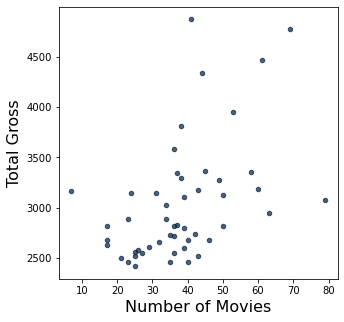

In [7]:
actors.scatter('Number of Movies', 'Total Gross')

In [3]:
actors.plot('Actor','Total Gross')

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Scatter plots

What is the relationship between `Number of Movies` and `Average per Movie`?

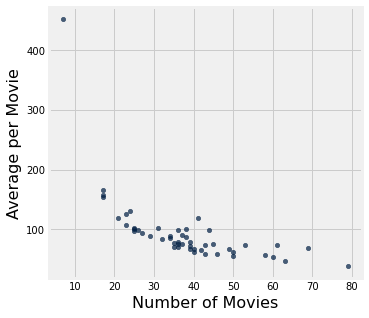

In [14]:
actors.scatter('Number of Movies', 'Average per Movie')

In [11]:
actors.where('Number of Movies', are.below(20))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Orlando Bloom,2815.8,17,165.6,Dead Man's Chest,423.3
Emma Watson,2681.9,17,157.8,Harry Potter / Deathly Hallows (P2),381
Daniel Radcliffe,2634.4,17,155,Harry Potter / Deathly Hallows (P2),381


## Two interesting things...

- A *negative* association.
- An outlier.

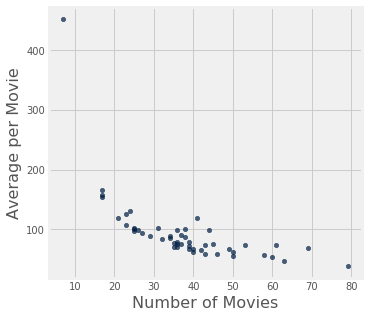


## "Zoom in" to exclude the outlier...

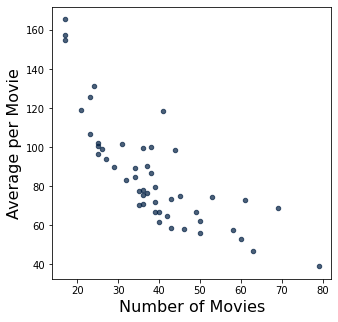

In [12]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

## Who are these people?

In [ ]:
actors.where('Number of Movies', are.above(60))

## Who is the outlier?

- Made very few, high grossing movies.

In [ ]:
actors.where('Number of Movies', are.below(10))

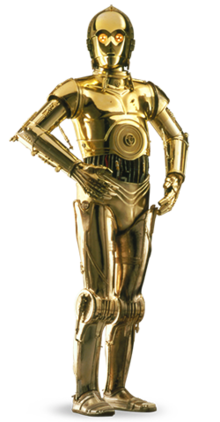

# Line graphs

## More new data: `movies_by_year.csv`

|Column|	Content|
|------|-----------|
Year|	Year
Total Gross|	Total domestic box office gross, in millions of dollars, of all movies released
Number of Movies|	Number of movies released
#1 Movie|	Highest grossing movie

In [15]:
by_year = Table.read_table('movies_by_year.csv')
by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


## Line graphs

- Visualize trend (often over time).
- `.plot()` method:
    - First argument: column for horizontal axis.
    - Second argument: column for vertical axis.

## Line graphs

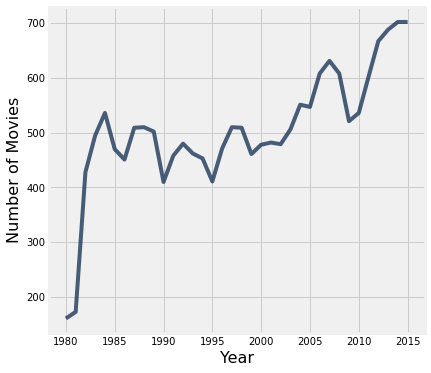

In [16]:
# how has # of movies changed over time?
by_year.plot('Year', 'Number of Movies')

## Line graphs

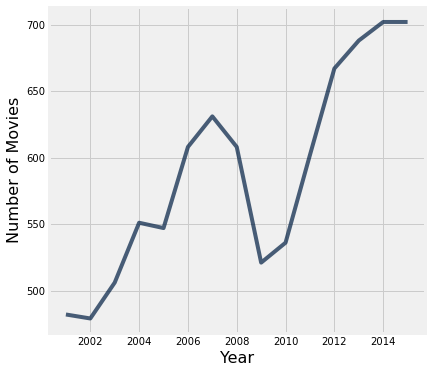

In [17]:
# let's focus on recent years (2000+)
recent = by_year.where('Year', are.above(2000))
recent.plot('Year', 'Number of Movies')

What happened in 2009/2010?

## How did this affect total gross?

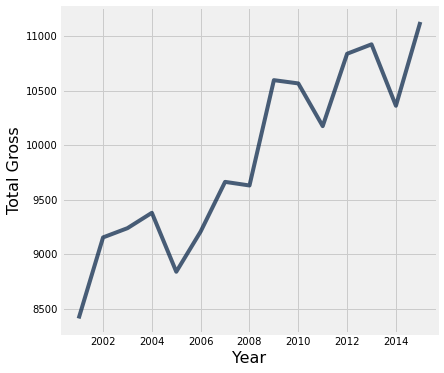

In [18]:
recent.plot('Year', 'Total Gross')

## Trivia: What was the top movie of 2009?

In [19]:
recent.where('Year', 2009)

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


# Visualizing categorical distributions

Suppose we have a record of ice cream cones sold:

|Flavor|
|------|
|Vanilla|
Chocolate
Chocolate
Vanilla
Strawberry
Chocolate
Chocolate

We want to visualize the *frequency* of each flavor.

## Categorical *distributions*

We write down the frequency of each flavor in a table:

In [22]:
flavors = Table().with_columns( 'Flavor', make_array('Vanilla', 'Chocolate', 'Strawberry'), 'Count', [2,4,1])
flavors

Flavor,Count
Vanilla,2
Chocolate,4
Strawberry,1


## Bar charts

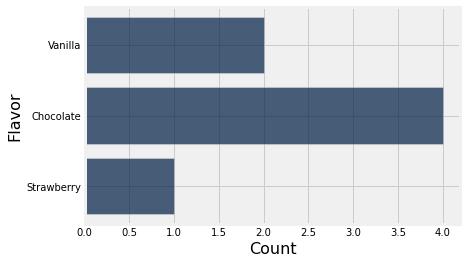

In [23]:
# draw a bar graph
flavors.barh('Flavor')

## Bar charts

- Unlike scatter/line graphs:
    - Height (vertical size) and spacing of bars is arbitrary.
    - Only one numerical variable (horizontal axis)
    - Order of vertical labels doesn't matter

## A (slightly) nicer visualization...

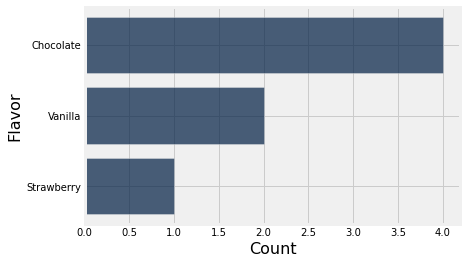

In [24]:
# sort the columns before plotting
flavors.sort('Count', descending=True).barh('Flavor') 

## Yet another new data set: `top_movies.csv`

In [25]:
#: read in the csv
top_movies = Table.read_table('top_movies.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


## What is the distribution of studios?

- That is, what is the count of each?
- `.group()` method:
    - First argument: column to group by
    - Counts members in group by default

## Counting movies by studio

In [26]:
by_studio = top_movies.group('Studio')
by_studio

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


## Visualize with a bar chart

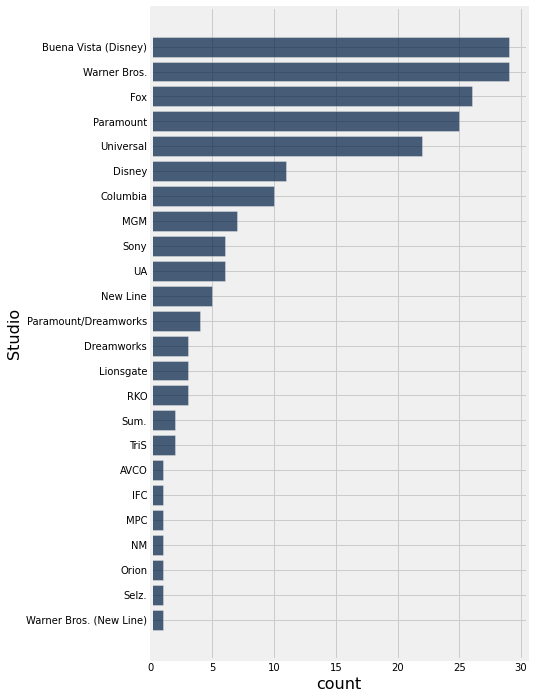

In [27]:
by_studio.sort('count', descending=True).barh('Studio')

## Discussion question

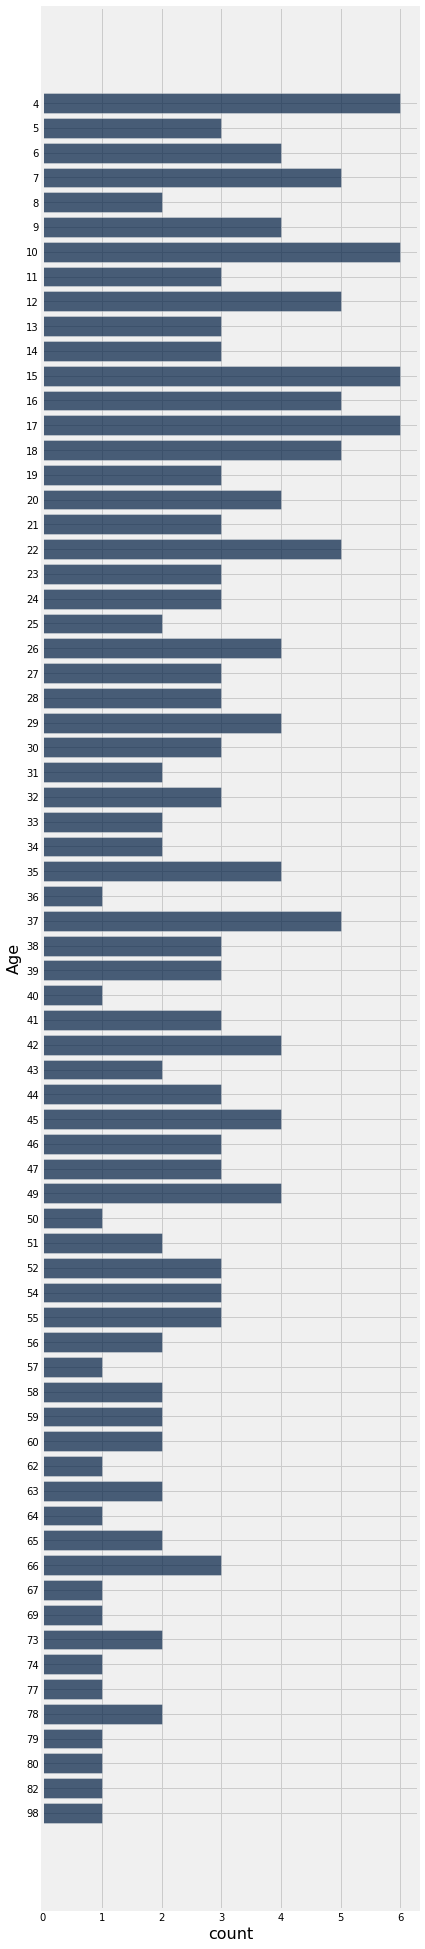

In [40]:
aged = top_movies.with_column("Age", 2019 - top_movies.column('Year'))
aged.group('Age').barh('Age')

In [29]:
aged

Title,Studio,Gross,Gross (Adjusted),Year,Age
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015,4
Avatar,Fox,760507625,846120800,2009,10
Titanic,Paramount,658672302,1178627900,1997,22
Jurassic World,Universal,652270625,687728000,2015,4
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012,7
The Dark Knight,Warner Bros.,534858444,647761600,2008,11
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999,20
Star Wars,Fox,460998007,1549640500,1977,42
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015,4
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012,7


Suppose we run this code. What do we get?

B

- A) A bar for each movie. Its length is the age of the movie.
- B) A bar for each age. Its length is the number of movies of that age.
- C) A bar for each year. Its length is the age of movies made that year.

## By the way...

- Used for more than just categorical distributions
- Example: how much did each movie make?

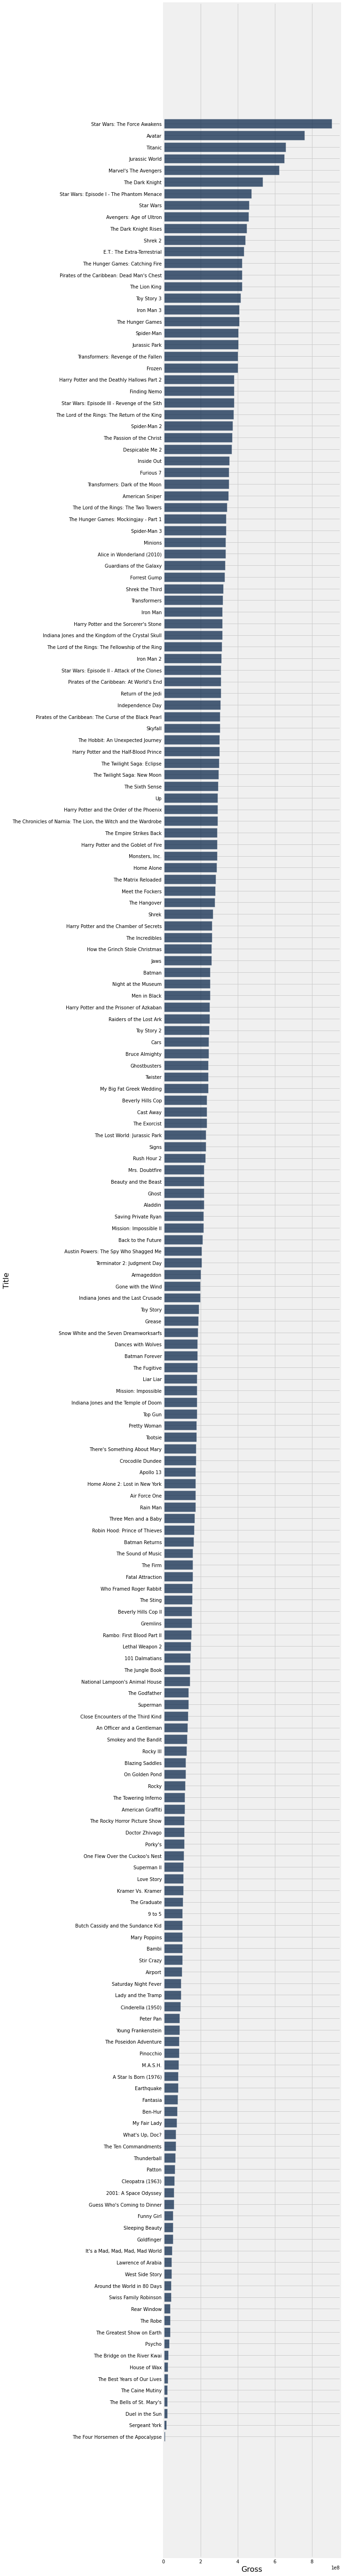

In [38]:
top_movies.barh('Title', 'Gross')

## Distribution of top movies by year

Some years have multiple top movies:

In [ ]:
top_movies.where('Year', 2010)

## Count of top movies by year

In [ ]:
top_movies.group('Year')#.barh('Year')

## Observations...

- The bar chart doesn't "space" the years. It treats years as categories.
    - For example, there is no gap between 1921 and 1937.
- It doesn't make sense for us to sort by the length of the bars. We want years in chronological order.

In [ ]:
#: top movies before 1945
top_movies.where('Year', are.below(1945)).group('Year').barh('Year')

## Is `Year` a categorical or numerical variable?

- Categorical: we can group by it.
- Numerical: we sometimes do arithmetic, and there's a natural order.

# Overlaying plots

### Recall the female:male plot from the census
* There are *many* more women than men in old-age!

In [ ]:
ratios.plot('AGE')

### What about absolute numbers?
* Make a new table with columns: `age`, `male population`, `female population`

In [ ]:
Table().with_columns(
    ('age', male.column('AGE')),
    ('male', male.column('2015')),
    ('female', female.column('2015'))
)#.plot('age')

### To plot multiple line graphs at once:
* Drop all extraneous columns from your table.
* Specify the column for the x-axis in the `.plot(col)` method.
* `plot` will plot all other columns on a shared y-axis.

### Plot the overall population by age for both 2010 and 2015
* Use both sexes
* Don't forget `AGE=999`!

In [ ]:
# plot overall population by age for both 2010 and 2015
census = (
    Table
    .read_table('./census.csv')
    .relabeled('POPESTIMATE2010', '2010')
    .relabeled('POPESTIMATE2015', '2015')
    .select('SEX', 'AGE', '2010', '2015')
)
census.where('SEX', 0).drop('SEX').where('AGE', are.below(100)).plot('AGE')

## Bar graphs work similarly

* Drop all extraneous columns from your table.
* Specify the column for the categories in the `.barh(col)` method.
* `barh` will plot bars for each column.

In [ ]:
# plot 2010/2015 totals by SEX
census.where('AGE', 999).drop('AGE').barh('SEX')

# Histograms

### Visualizing distributions of numerical values

### But first, binning

## Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Lower bound in included
* Upper bound is not included (unless it's the last bin)

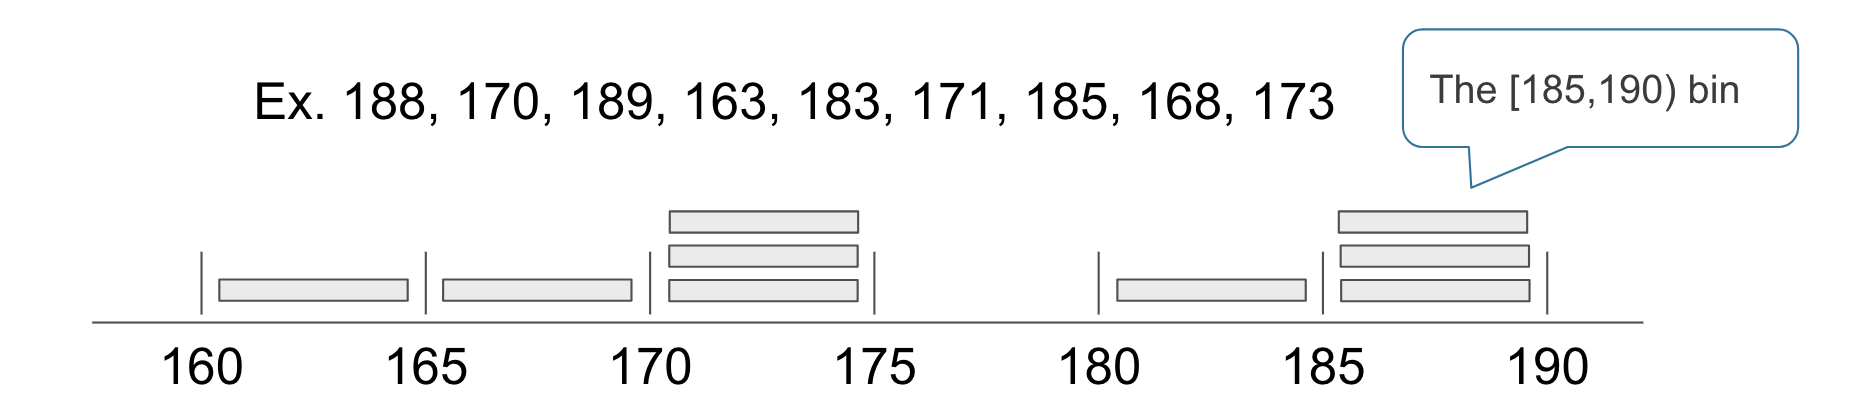    

### Top Movies
* Read `top_movies.csv`
* Create column `Age` that denotes the age of a movie in years, from 2018

In [41]:
top_movies = Table.read_table('top_movies.csv')
aged = top_movies.with_column('Age', 2019 - top_movies.column('Year'))

### Categorical distribution of `Age`
Recall `.group("Age")` calculates the categorical distribution of the column `Age`.

In [42]:
aged.group("Age")#.barh('Age')

Age,count
4,6
5,3
6,4
7,5
8,2
9,4
10,6
11,3
12,5
13,3


Sometimes we want to collect nearby bars into a single bin, so we can see overall trends more easily.

### Numerical distribution of `Age`
The method `.bin(col, bins=arr)` calculates the distribution of values of `col` in each bin in the array `arr`.
* Bins need not be evenly spaced (e.g. [0, 5, 10, 20, 40, 65, 100])
* Last row of table (last entry in array) represents the right endpoint of the last bin.

In [43]:
aged.bin('Age', bins=np.arange(0, 101, 5))

bin,Age count
0,6
5,18
10,20
15,25
20,18
25,16
30,12
35,16
40,13
45,14


In [ ]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40, 65, 100))

### Binning may not capture all the data
What happens if the right endpoint is `Age = 40`?
* May not capture all the data!

In [ ]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40))

### Binning may not capture all the data
Question: Why did the count corresponding to 20 increase?

In [ ]:
aged.where('Age', 40)

### Default binning
10 bins of equal width

In [ ]:
bins = aged.bin('Age').column('bin')
bins

### Create your own evenly spaced bins with `np.arange`
* To create `N` evenly spaced bins of an array `a`:
```
np.arange(a.min(), a.max(), (a.max() - a.min()) / (N + 1))
```
* create 5 bins for `Age` containing all the data.

## Histogram
A chart displaying the distribution of numerical values using bins

### Plot a histogram of movie ages
* change to custom bins `np.arange(0, 101, 20)`; use `unit=year`.
* try `normed=False` for plot of counts. Why are the default units so strange?

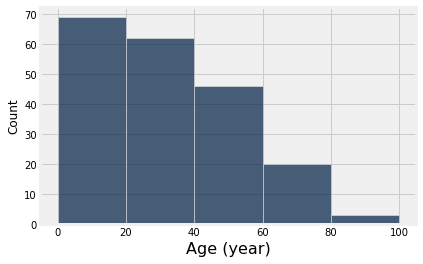

In [47]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year', normed=False)

### Discussion Question

What should happen to our histogram if we combine the two bins [20, 40) and [40, 60) into one large bin [20, 60)?

Option | Answer
--- | ---
A. | The new histogram should have four bars of equal width.
B. | The height of the bar for bin [20, 60) should be the sum of the heights of the bars for bins [20, 40) and [40, 60).
C. | The area of the bar for bin [20, 60) should be the sum of the areas of the bars for bins [20, 40) and [40, 60).
D. | More than one of the above.


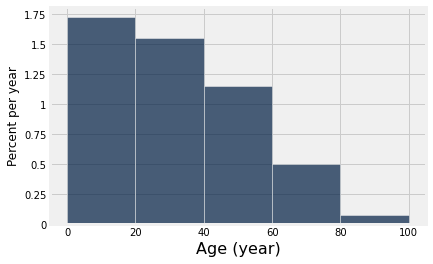

In [55]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year',normed=True)

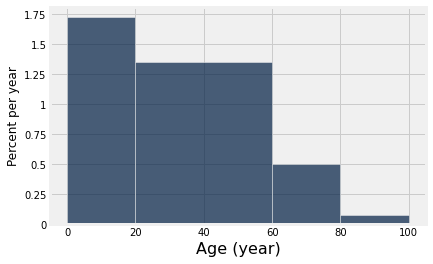

In [54]:
aged.hist('Age', bins=[0,20,60,80,100], unit='year',normed=True)

# The Density Scale

### Histogram Axes

By default, `hist` uses a scale (`normed=True`) that ensures the area of the chart sums to 100%
* The horizontal axis is a number line (e.g. years)
* The vertical axis is a rate (e.g. percent per year)
* The area of the bar is a percentage of the whole

### Varying histogram bin sizes: how the y-axis changes

* Try varying number of bins: 1, 2, 5, 10, 20, 50
* Watch the y-axis and the total area

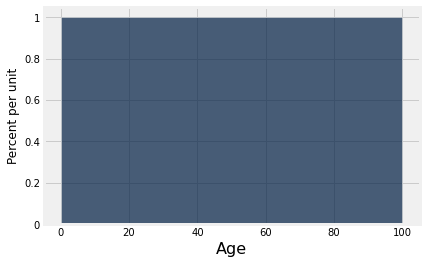

In [56]:
aged.hist('Age', bins=[0 ,100])

In [ ]:
aged.hist('Age', bins=[0, 50 ,100])

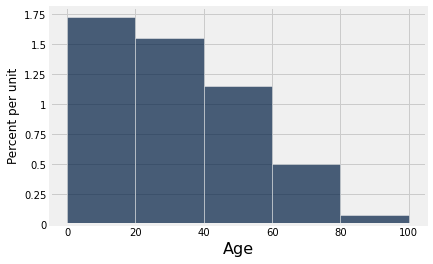

In [57]:
aged.hist('Age', bins=[0, 20, 40, 60, 80 ,100])

In [ ]:
aged.hist('Age', bins=np.arange(0,101,10))

In [ ]:
aged.hist('Age', bins=np.arange(0,101,5))

In [ ]:
aged.hist('Age', bins=np.arange(0,101,2))

### How to calculate height

The $[20, 40)$ bin contains 62 out of 200 movies.
* $62/200 = 31%$
* The bin is $40 - 20 = 20$ years wide.

$$ \rm{Height\ of\ bar} = \frac{\rm{Area}}{\rm{Width}} = \frac{31 \%}{20\rm{\ years}} = 1.55\%\rm{\ per\ year} $$


In [ ]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40, 65, 100))

In [ ]:
aged.hist('Age', bins=[0,20,40,60,80,100], unit='year')

### Height measures density

$$ \rm{Height} = \frac{\% \rm{\ in\ bin}}{\rm{width\ of\ bin}}$$

* The height measures the percent of data in the bin **relative to the amount of space in the bin**.
* Height measures crowdedness, or **density**.

### Discussion Question: Combining Bins

Suppose we combine the two bins [20, 40) and [40, 60) into one large bin [20, 60). What is the density of the new bin?

Option|Answer
---|---
A. | The new bin has about twice as many movies as each original bin, so it is about twice as dense as each original bin.
B. | The new bin is about twice as big as each original bin, so it is about half as dense as each original bin.
C. | The new bin has about twice as many movies and is twice as big as each original bin, so it is about the same density as each original bin.

In [ ]:
aged.hist('Age', bins=[0,20,40,60,80,100], unit='year')

In [ ]:
aged.hist('Age', bins=[0,20,60,80,100], unit='year')

### Area measures percentages

How many individual are in the bin? Use a percentage of the total.

* Area of bin * total number of individuals

# Chart Types

## Bar Charts vs. Histograms

Bar Chart | Histogram
---|---
1 categorical axis & 1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, height and spacing | Horizontal axis is numerical and to scale
For distributions, length of bars are proportional to the percent of individuals | Height measures density; areas are proportional to the percent of individuals

# Overlaid Histograms

For visually comparing two populations

Galton collected data on the heights of families.

In [ ]:
heights = Table.read_table('galton.csv').select('childHeight', 'father', 'mother').relabeled('childHeight', 'child')
heights

### Plot histograms of `child`, `father`, and `mother` in one plot

In [ ]:
heights.hist('child', unit='inch')

In [ ]:
heights.hist('father', unit='inch')

In [ ]:
heights.hist('child', 'father', unit='inch')

In [ ]:
heights.hist('child', 'father', 'mother', unit='inch')

### Scatterplot is better
* In the histogram, you can't tell which father/mother goes with which child

In [ ]:
heights.scatter('child', 'father')

In [ ]:
heights.scatter('child', 'mother')

In [ ]:
heights.scatter('child')

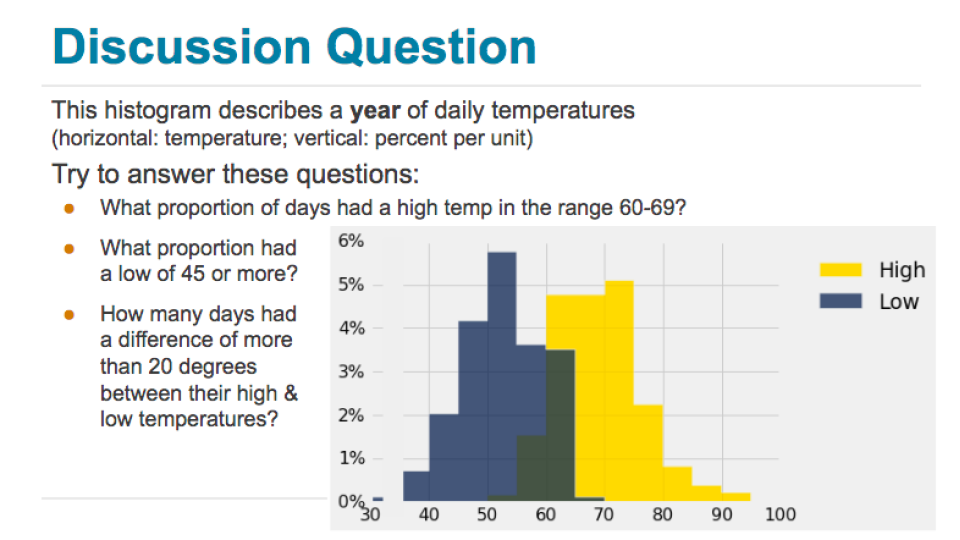